<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Linear%20and%20Ridge%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import key libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm

In [ ]:
#import matplotlib
import matplotlib.pyplot as plt
plt.matplotlib.rcParams.update({'font.size': 12})

In [ ]:
#Import and load Boston datasets
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Load Linear Regression and Ridge datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
#Use 'Price' as target and drop 'Price' from 'newX'
df['Price']=boston.target
newX=df.drop('Price',axis=1)
newX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Split Dataset into train and test (30%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newX,df,test_size=0.3)

In [ ]:
#define 'lr' and 'rr' with coresponding alphas (.01,100)
lr = LinearRegression()
rr = Ridge(alpha=.01)
rr100 = Ridge(alpha=100)

In [ ]:
#Fit the train model for 'lr' and 'rr'
lr.fit(x_train, y_train)
rr.fit(x_train, y_train)
rr100.fit(x_train, y_train)

Ridge(alpha=100)

In [ ]:
#Print scores for 3 models
train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
print("LR train score:", train_score)
print("LR test score:", test_score)
print("RR train score:", Ridge_train_score) 
print("RR test score:", Ridge_test_score) 
print("RR100 train score:", Ridge_train_score100) 
print("RR100 test score:", Ridge_test_score100) 

LR train score: 0.9839886695315726
LR test score: 0.9733391451331356
RR train score: 0.9839872256817157
RR test score: 0.9733387173170087
RR100 train score: 0.9098696205947036
RR100 test score: 0.895606400127658


When comparing the the Ridge models, the model with a lower alpha is around 7% more accuate than the higher alpha model.

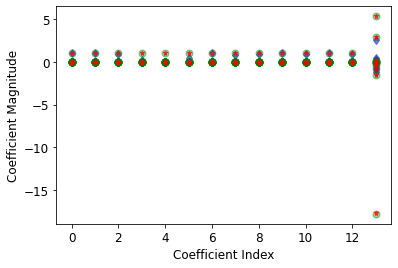

In [ ]:
#Plot Coefficient Magnitude and Coefficient Index for 3 models
#Red=Ridge, Blue=Ridge100, Green=Linear Regression
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.show()